In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features6.csv')
df=df.drop(['rolloff','zero_crossing_rate','chroma_stft','spectral_centroid','spectral_bandwidth'],axis=1)
df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,English Type
0,-351.79230,147.745390,19.917744,31.775644,23.516031,2.070087,9.844380,0.265172,-2.338450,-1.322878,-9.483175,-1.679585,-0.177087,0
1,-410.52670,125.953590,-20.461075,17.156311,-6.669661,15.239104,-16.752926,-3.614888,-5.258536,-7.771095,-2.448791,-5.192124,-2.269287,0
2,-342.62964,78.433655,12.540177,31.937393,-2.213818,15.747808,-39.245610,-5.218530,-16.471539,-5.059716,-14.047500,-2.351587,-14.914782,0
3,-331.50244,108.531410,-21.552880,42.042065,-4.467168,9.407474,1.117538,-26.776285,-9.033010,-18.285458,5.542378,1.801108,-12.343457,1
4,-306.30480,105.473820,-2.033697,33.645050,19.767216,14.690701,-7.823933,16.233910,1.511278,-1.097624,-4.256559,5.822567,-5.417769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,-367.42440,153.012450,-6.412210,19.019106,17.933186,-5.957310,-0.477651,-18.703012,-15.582651,-1.840943,-12.552829,-8.802483,-3.864208,1
2134,-321.66678,128.274500,-3.335473,28.203968,15.083783,16.396720,4.090911,10.306094,2.037651,0.225633,1.150143,1.580174,-2.241047,0
2135,-253.21036,93.182236,9.850489,38.595917,-14.542635,16.471262,-13.102000,20.879627,-8.502631,6.002625,12.753398,2.869624,-1.761060,0
2136,-322.13104,150.674900,-11.696100,24.301128,10.992788,-7.354234,20.903921,-4.221878,-11.789002,8.365523,-4.948959,-10.440193,-3.944272,0


In [3]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


(1710, 13) (1710,)


In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1500, batch_size=40,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


Epoch 1/1500
43/43 [==============================] - 1s 10ms/step - loss: 1.1292 - val_loss: 1.0364
Epoch 2/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.9368 - val_loss: 0.8959
Epoch 3/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.8315 - val_loss: 0.8216
Epoch 4/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7718 - val_loss: 0.7755
Epoch 5/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7339 - val_loss: 0.7451
Epoch 6/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.7082 - val_loss: 0.7232
Epoch 7/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6890 - val_loss: 0.7064
Epoch 8/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6739 - val_loss: 0.6928
Epoch 9/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6615 - val_loss: 0.6814
Epoch 10/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.6512 - val_loss: 0.672

43/43 [==============================] - 0s 3ms/step - loss: 0.5864 - val_loss: 0.6082
Epoch 83/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5863 - val_loss: 0.6082
Epoch 84/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5863 - val_loss: 0.6082
Epoch 85/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5863 - val_loss: 0.6081
Epoch 86/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5862 - val_loss: 0.6082
Epoch 87/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5862 - val_loss: 0.6081
Epoch 88/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5862 - val_loss: 0.6080
Epoch 89/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.6080
Epoch 90/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.6080
Epoch 91/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.6080
Epoc

43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 163/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6072
Epoch 164/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 165/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 166/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 167/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 168/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 169/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 170/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.6071
Epoch 171/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5852 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 243/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5850 - val_loss: 0.6068
Epoch 244/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 245/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 246/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 247/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5850 - val_loss: 0.6068
Epoch 248/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6067
Epoch 249/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 250/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.6068
Epoch 251/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 323/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 324/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 325/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 326/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 327/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.6067
Epoch 328/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5848 - val_loss: 0.6067
Epoch 329/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 330/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5848 - val_loss: 0.6066
Epoch 331/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5848 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 403/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 404/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 405/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 406/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 407/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 408/1500
43/43 [==============================] - 0s 5ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 409/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 410/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 411/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 483/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 484/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 485/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 486/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 487/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6065
Epoch 488/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 489/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 490/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5847 - val_loss: 0.6064
Epoch 491/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 563/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 564/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 565/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 566/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 567/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 568/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 569/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 570/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 571/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 643/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 644/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 645/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 646/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 647/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 648/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 649/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6064
Epoch 650/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 651/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5846 - val_loss: 0.

43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 723/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 724/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 725/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 726/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 727/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 728/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 729/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.6063
Epoch 730/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 731/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 803/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 804/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 805/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 806/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 807/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 808/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 809/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 810/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 811/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 883/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 884/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 885/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 886/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 887/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 888/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 889/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 890/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 891/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 963/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 964/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 965/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 966/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 967/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 968/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 969/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 970/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 971/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.

43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1043/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1044/1500
43/43 [==============================] - 0s 5ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1045/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1046/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1047/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1048/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1049/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1050/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1051/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1122/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1123/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1124/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1125/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1126/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1127/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1128/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1129/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1130/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1201/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1202/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1203/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1204/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1205/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1206/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1207/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1208/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1209/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1280/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1281/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1282/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6062
Epoch 1283/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1284/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1285/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.6063
Epoch 1286/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1287/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1288/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5845 - val

43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1359/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1360/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1361/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.6062
Epoch 1362/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1363/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1364/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1365/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1366/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1367/1500
43/43 [==============================] - 0s 4ms/step - loss: 0.5844 - val

43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1438/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1439/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1440/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1441/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1442/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1443/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1444/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1445/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.6063
Epoch 1446/1500
43/43 [==============================] - 0s 3ms/step - loss: 0.5844 - val

In [7]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8177570093457944
Precision:  0.6687265263341776
Recall:  0.8177570093457944
F1-score:  0.7357710881003291
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       350
           1       0.00      0.00      0.00        78

    accuracy                           0.82       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.67      0.82      0.74       428



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 79.67%


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


# Print classification report
print(classification_report(y_test, y_pred))



Accuracy:  0.7967289719626168
Precision:  0.7340326059228682
Recall:  0.7967289719626168
F1-score:  0.7515847145850859
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       350
           1       0.32      0.10      0.16        78

    accuracy                           0.80       428
   macro avg       0.57      0.53      0.52       428
weighted avg       0.73      0.80      0.75       428



# CNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [11]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [13]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [14]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=40,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
38/38 [==============================] - 2s 16ms/step - loss: 1.5150 - accuracy: 0.7239 - val_loss: 0.5518 - val_accuracy: 0.8131
Epoch 2/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.7821 - val_loss: 0.5011 - val_accuracy: 0.8084
Epoch 3/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.5175 - accuracy: 0.7955 - val_loss: 0.4847 - val_accuracy: 0.8100
Epoch 4/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.8162 - val_loss: 0.4934 - val_accuracy: 0.7913
Epoch 5/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.4742 - accuracy: 0.8155 - val_loss: 0.5019 - val_accuracy: 0.8100
Epoch 6/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.8262 - val_loss: 0.4797 - val_accuracy: 0.8100
Epoch 7/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.4453 - accuracy: 0.8235 - val_loss: 0.4782 - val_accuracy: 0.8115
Epoch

38/38 [==============================] - 0s 8ms/step - loss: 0.3538 - accuracy: 0.8543 - val_loss: 0.4944 - val_accuracy: 0.8069
Epoch 59/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3529 - accuracy: 0.8463 - val_loss: 0.5089 - val_accuracy: 0.8037
Epoch 60/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8516 - val_loss: 0.4983 - val_accuracy: 0.8053
Epoch 61/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3487 - accuracy: 0.8496 - val_loss: 0.5002 - val_accuracy: 0.7928
Epoch 62/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3462 - accuracy: 0.8483 - val_loss: 0.5043 - val_accuracy: 0.8084
Epoch 63/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.3459 - accuracy: 0.8496 - val_loss: 0.5024 - val_accuracy: 0.7944
Epoch 64/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.3522 - accuracy: 0.8436 - val_loss: 0.5091 - val_accuracy: 0.8053
Epoch 65/1500

38/38 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 0.8683 - val_loss: 0.5726 - val_accuracy: 0.7804
Epoch 116/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2829 - accuracy: 0.8750 - val_loss: 0.6213 - val_accuracy: 0.7819
Epoch 117/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.8697 - val_loss: 0.6106 - val_accuracy: 0.7866
Epoch 118/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.8817 - val_loss: 0.6034 - val_accuracy: 0.7773
Epoch 119/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2818 - accuracy: 0.8770 - val_loss: 0.6118 - val_accuracy: 0.7648
Epoch 120/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2810 - accuracy: 0.8703 - val_loss: 0.6044 - val_accuracy: 0.7866
Epoch 121/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.8717 - val_loss: 0.6054 - val_accuracy: 0.7523
Epoch 1

Epoch 172/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.2258 - accuracy: 0.9037 - val_loss: 0.7470 - val_accuracy: 0.7679
Epoch 173/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2079 - accuracy: 0.9118 - val_loss: 0.8054 - val_accuracy: 0.7695
Epoch 174/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2073 - accuracy: 0.9111 - val_loss: 0.7728 - val_accuracy: 0.7726
Epoch 175/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.9057 - val_loss: 0.8012 - val_accuracy: 0.7648
Epoch 176/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.2177 - accuracy: 0.9124 - val_loss: 0.7693 - val_accuracy: 0.7710
Epoch 177/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.2201 - accuracy: 0.9078 - val_loss: 0.7337 - val_accuracy: 0.7757
Epoch 178/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.9078 - val_loss: 0.7520 - val_accuracy:

Epoch 229/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.2002 - accuracy: 0.9144 - val_loss: 0.9059 - val_accuracy: 0.7726
Epoch 230/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1686 - accuracy: 0.9305 - val_loss: 0.9083 - val_accuracy: 0.7804
Epoch 231/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1708 - accuracy: 0.9291 - val_loss: 0.9171 - val_accuracy: 0.7695
Epoch 232/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1802 - accuracy: 0.9231 - val_loss: 1.0000 - val_accuracy: 0.7804
Epoch 233/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1821 - accuracy: 0.9265 - val_loss: 0.9096 - val_accuracy: 0.7368
Epoch 234/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1523 - accuracy: 0.9358 - val_loss: 0.9403 - val_accuracy: 0.7726
Epoch 235/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1648 - accuracy: 0.9271 - val_loss: 0.9725 - val_accuracy:

Epoch 286/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1733 - accuracy: 0.9231 - val_loss: 1.0318 - val_accuracy: 0.7710
Epoch 287/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1717 - accuracy: 0.9291 - val_loss: 1.0243 - val_accuracy: 0.7632
Epoch 288/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1800 - accuracy: 0.9305 - val_loss: 1.0191 - val_accuracy: 0.7664
Epoch 289/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1602 - accuracy: 0.9332 - val_loss: 0.9946 - val_accuracy: 0.7710
Epoch 290/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1629 - accuracy: 0.9258 - val_loss: 1.0406 - val_accuracy: 0.7741
Epoch 291/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1710 - accuracy: 0.9231 - val_loss: 0.9955 - val_accuracy: 0.7741
Epoch 292/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1617 - accuracy: 0.9352 - val_loss: 1.0410 - val_accuracy:

Epoch 343/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1635 - accuracy: 0.9285 - val_loss: 1.1150 - val_accuracy: 0.7617
Epoch 344/1500
38/38 [==============================] - 0s 7ms/step - loss: 0.1587 - accuracy: 0.9325 - val_loss: 1.1315 - val_accuracy: 0.7632
Epoch 345/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1544 - accuracy: 0.9372 - val_loss: 1.0786 - val_accuracy: 0.7679
Epoch 346/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1470 - accuracy: 0.9398 - val_loss: 1.1127 - val_accuracy: 0.7710
Epoch 347/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.1430 - accuracy: 0.9385 - val_loss: 1.1391 - val_accuracy: 0.7679
Epoch 348/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1489 - accuracy: 0.9398 - val_loss: 1.0763 - val_accuracy: 0.7648
Epoch 349/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.1392 - accuracy: 0.9418 - val_loss: 1.1024 - val_accuracy:

Epoch 400/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9519 - val_loss: 1.1501 - val_accuracy: 0.7570
Epoch 401/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1097 - accuracy: 0.9532 - val_loss: 1.1884 - val_accuracy: 0.7664
Epoch 402/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.9512 - val_loss: 1.1497 - val_accuracy: 0.7741
Epoch 403/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1248 - accuracy: 0.9499 - val_loss: 1.1770 - val_accuracy: 0.7819
Epoch 404/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1216 - accuracy: 0.9512 - val_loss: 1.1937 - val_accuracy: 0.7804
Epoch 405/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1400 - accuracy: 0.9439 - val_loss: 1.2167 - val_accuracy: 0.7710
Epoch 406/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9519 - val_loss: 1.2002 - val_accuracy:

Epoch 457/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1082 - accuracy: 0.9566 - val_loss: 1.2408 - val_accuracy: 0.7741
Epoch 458/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1092 - accuracy: 0.9572 - val_loss: 1.2536 - val_accuracy: 0.7757
Epoch 459/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9592 - val_loss: 1.2325 - val_accuracy: 0.7648
Epoch 460/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0950 - accuracy: 0.9632 - val_loss: 1.2197 - val_accuracy: 0.7710
Epoch 461/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1102 - accuracy: 0.9599 - val_loss: 1.2731 - val_accuracy: 0.7710
Epoch 462/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1159 - accuracy: 0.9519 - val_loss: 1.2504 - val_accuracy: 0.7757
Epoch 463/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9566 - val_loss: 1.3103 - val_accuracy:

Epoch 514/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1058 - accuracy: 0.9659 - val_loss: 1.3046 - val_accuracy: 0.7679
Epoch 515/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1037 - accuracy: 0.9619 - val_loss: 1.2784 - val_accuracy: 0.7757
Epoch 516/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.9492 - val_loss: 1.3244 - val_accuracy: 0.7695
Epoch 517/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1284 - accuracy: 0.9492 - val_loss: 1.2454 - val_accuracy: 0.7695
Epoch 518/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1191 - accuracy: 0.9465 - val_loss: 1.2528 - val_accuracy: 0.7726
Epoch 519/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1160 - accuracy: 0.9525 - val_loss: 1.3073 - val_accuracy: 0.7586
Epoch 520/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1086 - accuracy: 0.9532 - val_loss: 1.3026 - val_accuracy:

Epoch 571/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1157 - accuracy: 0.9559 - val_loss: 1.3147 - val_accuracy: 0.7850
Epoch 572/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.9579 - val_loss: 1.3061 - val_accuracy: 0.7741
Epoch 573/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1219 - accuracy: 0.9472 - val_loss: 1.2792 - val_accuracy: 0.7679
Epoch 574/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9646 - val_loss: 1.3330 - val_accuracy: 0.7773
Epoch 575/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1156 - accuracy: 0.9532 - val_loss: 1.2802 - val_accuracy: 0.7773
Epoch 576/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 0.9499 - val_loss: 1.2599 - val_accuracy: 0.7726
Epoch 577/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1088 - accuracy: 0.9552 - val_loss: 1.3183 - val_accuracy:

Epoch 628/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1097 - accuracy: 0.9599 - val_loss: 1.4402 - val_accuracy: 0.7819
Epoch 629/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1109 - accuracy: 0.9619 - val_loss: 1.3907 - val_accuracy: 0.7804
Epoch 630/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1045 - accuracy: 0.9572 - val_loss: 1.3126 - val_accuracy: 0.7679
Epoch 631/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9525 - val_loss: 1.3203 - val_accuracy: 0.7773
Epoch 632/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0968 - accuracy: 0.9626 - val_loss: 1.3499 - val_accuracy: 0.7850
Epoch 633/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1002 - accuracy: 0.9606 - val_loss: 1.3875 - val_accuracy: 0.7819
Epoch 634/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1034 - accuracy: 0.9566 - val_loss: 1.3048 - val_accuracy:

Epoch 685/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0996 - accuracy: 0.9586 - val_loss: 1.4132 - val_accuracy: 0.7741
Epoch 686/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0703 - accuracy: 0.9739 - val_loss: 1.5104 - val_accuracy: 0.7757
Epoch 687/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9566 - val_loss: 1.4653 - val_accuracy: 0.7850
Epoch 688/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0833 - accuracy: 0.9672 - val_loss: 1.4026 - val_accuracy: 0.7773
Epoch 689/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0883 - accuracy: 0.9679 - val_loss: 1.4291 - val_accuracy: 0.7913
Epoch 690/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1030 - accuracy: 0.9619 - val_loss: 1.4008 - val_accuracy: 0.7804
Epoch 691/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.1084 - accuracy: 0.9566 - val_loss: 1.4223 - val_accuracy:

Epoch 742/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0985 - accuracy: 0.9592 - val_loss: 1.4201 - val_accuracy: 0.7757
Epoch 743/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9626 - val_loss: 1.4435 - val_accuracy: 0.7788
Epoch 744/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0838 - accuracy: 0.9693 - val_loss: 1.4205 - val_accuracy: 0.7726
Epoch 745/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0815 - accuracy: 0.9672 - val_loss: 1.4966 - val_accuracy: 0.7819
Epoch 746/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9619 - val_loss: 1.4702 - val_accuracy: 0.7804
Epoch 747/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1020 - accuracy: 0.9619 - val_loss: 1.4285 - val_accuracy: 0.7819
Epoch 748/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0985 - accuracy: 0.9646 - val_loss: 1.4147 - val_accuracy:

Epoch 799/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9659 - val_loss: 1.4716 - val_accuracy: 0.7741
Epoch 800/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0888 - accuracy: 0.9672 - val_loss: 1.4372 - val_accuracy: 0.7679
Epoch 801/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0780 - accuracy: 0.9666 - val_loss: 1.5177 - val_accuracy: 0.7679
Epoch 802/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9666 - val_loss: 1.5355 - val_accuracy: 0.7773
Epoch 803/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9746 - val_loss: 1.5648 - val_accuracy: 0.7648
Epoch 804/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9686 - val_loss: 1.5723 - val_accuracy: 0.7773
Epoch 805/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0679 - accuracy: 0.9779 - val_loss: 1.5576 - val_accuracy:

Epoch 856/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9686 - val_loss: 1.5407 - val_accuracy: 0.7741
Epoch 857/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0946 - accuracy: 0.9686 - val_loss: 1.4972 - val_accuracy: 0.7835
Epoch 858/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9619 - val_loss: 1.4867 - val_accuracy: 0.7788
Epoch 859/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9646 - val_loss: 1.5719 - val_accuracy: 0.7882
Epoch 860/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1088 - accuracy: 0.9639 - val_loss: 1.5622 - val_accuracy: 0.7850
Epoch 861/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0929 - accuracy: 0.9686 - val_loss: 1.4098 - val_accuracy: 0.7804
Epoch 862/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9646 - val_loss: 1.4966 - val_accuracy:

Epoch 913/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0688 - accuracy: 0.9686 - val_loss: 1.5581 - val_accuracy: 0.7679
Epoch 914/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9639 - val_loss: 1.5363 - val_accuracy: 0.7726
Epoch 915/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9733 - val_loss: 1.5861 - val_accuracy: 0.7835
Epoch 916/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0801 - accuracy: 0.9739 - val_loss: 1.5629 - val_accuracy: 0.7850
Epoch 917/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.9686 - val_loss: 1.5348 - val_accuracy: 0.7850
Epoch 918/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0765 - accuracy: 0.9739 - val_loss: 1.5232 - val_accuracy: 0.7835
Epoch 919/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0733 - accuracy: 0.9679 - val_loss: 1.5695 - val_accuracy:

Epoch 970/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.9733 - val_loss: 1.5218 - val_accuracy: 0.7928
Epoch 971/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0801 - accuracy: 0.9652 - val_loss: 1.4813 - val_accuracy: 0.7773
Epoch 972/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9679 - val_loss: 1.5657 - val_accuracy: 0.7788
Epoch 973/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9612 - val_loss: 1.5416 - val_accuracy: 0.7928
Epoch 974/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9713 - val_loss: 1.4674 - val_accuracy: 0.7664
Epoch 975/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1033 - accuracy: 0.9626 - val_loss: 1.4913 - val_accuracy: 0.7710
Epoch 976/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0734 - accuracy: 0.9726 - val_loss: 1.5524 - val_accuracy:

Epoch 1027/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.9733 - val_loss: 1.5856 - val_accuracy: 0.7882
Epoch 1028/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9739 - val_loss: 1.5970 - val_accuracy: 0.7866
Epoch 1029/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0843 - accuracy: 0.9706 - val_loss: 1.5589 - val_accuracy: 0.7741
Epoch 1030/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0804 - accuracy: 0.9659 - val_loss: 1.5779 - val_accuracy: 0.7788
Epoch 1031/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9693 - val_loss: 1.5565 - val_accuracy: 0.7695
Epoch 1032/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0757 - accuracy: 0.9739 - val_loss: 1.5148 - val_accuracy: 0.7695
Epoch 1033/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9626 - val_loss: 1.5435 - val_ac

38/38 [==============================] - 0s 5ms/step - loss: 0.0682 - accuracy: 0.9773 - val_loss: 1.6355 - val_accuracy: 0.7788
Epoch 1084/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0824 - accuracy: 0.9652 - val_loss: 1.6485 - val_accuracy: 0.7819
Epoch 1085/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0765 - accuracy: 0.9706 - val_loss: 1.6239 - val_accuracy: 0.7788
Epoch 1086/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0998 - accuracy: 0.9652 - val_loss: 1.6210 - val_accuracy: 0.7835
Epoch 1087/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9706 - val_loss: 1.6515 - val_accuracy: 0.7788
Epoch 1088/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9652 - val_loss: 1.6364 - val_accuracy: 0.7804
Epoch 1089/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9799 - val_loss: 1.6079 - val_accuracy: 0.7726
E

38/38 [==============================] - 0s 5ms/step - loss: 0.1032 - accuracy: 0.9713 - val_loss: 1.5852 - val_accuracy: 0.7773
Epoch 1140/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.9659 - val_loss: 1.6507 - val_accuracy: 0.7773
Epoch 1141/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0702 - accuracy: 0.9713 - val_loss: 1.6244 - val_accuracy: 0.7804
Epoch 1142/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0855 - accuracy: 0.9706 - val_loss: 1.6340 - val_accuracy: 0.7710
Epoch 1143/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.9679 - val_loss: 1.6753 - val_accuracy: 0.7788
Epoch 1144/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9753 - val_loss: 1.6788 - val_accuracy: 0.7835
Epoch 1145/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.9713 - val_loss: 1.5960 - val_accuracy: 0.7866
E

38/38 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9686 - val_loss: 1.6509 - val_accuracy: 0.7819
Epoch 1196/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0799 - accuracy: 0.9706 - val_loss: 1.5897 - val_accuracy: 0.7757
Epoch 1197/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0724 - accuracy: 0.9786 - val_loss: 1.5778 - val_accuracy: 0.7866
Epoch 1198/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.1026 - accuracy: 0.9626 - val_loss: 1.5754 - val_accuracy: 0.7882
Epoch 1199/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9672 - val_loss: 1.5073 - val_accuracy: 0.7850
Epoch 1200/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0776 - accuracy: 0.9699 - val_loss: 1.6484 - val_accuracy: 0.7866
Epoch 1201/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9739 - val_loss: 1.5885 - val_accuracy: 0.7835
E

38/38 [==============================] - 0s 5ms/step - loss: 0.0775 - accuracy: 0.9646 - val_loss: 1.5445 - val_accuracy: 0.7741
Epoch 1252/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9733 - val_loss: 1.5464 - val_accuracy: 0.7757
Epoch 1253/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9766 - val_loss: 1.5654 - val_accuracy: 0.7773
Epoch 1254/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9719 - val_loss: 1.5994 - val_accuracy: 0.7741
Epoch 1255/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 1.7033 - val_accuracy: 0.7850
Epoch 1256/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0845 - accuracy: 0.9666 - val_loss: 1.6258 - val_accuracy: 0.7788
Epoch 1257/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9779 - val_loss: 1.5884 - val_accuracy: 0.7773
E

38/38 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9786 - val_loss: 1.6150 - val_accuracy: 0.7773
Epoch 1308/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0720 - accuracy: 0.9719 - val_loss: 1.7115 - val_accuracy: 0.7710
Epoch 1309/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9733 - val_loss: 1.6690 - val_accuracy: 0.7850
Epoch 1310/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9699 - val_loss: 1.5664 - val_accuracy: 0.7617
Epoch 1311/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9739 - val_loss: 1.6140 - val_accuracy: 0.7710
Epoch 1312/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9766 - val_loss: 1.6647 - val_accuracy: 0.7804
Epoch 1313/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.9699 - val_loss: 1.5817 - val_accuracy: 0.7773
E

38/38 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9733 - val_loss: 1.7309 - val_accuracy: 0.7726
Epoch 1364/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0733 - accuracy: 0.9739 - val_loss: 1.8100 - val_accuracy: 0.7788
Epoch 1365/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9773 - val_loss: 1.7679 - val_accuracy: 0.7695
Epoch 1366/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0695 - accuracy: 0.9753 - val_loss: 1.7365 - val_accuracy: 0.7695
Epoch 1367/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9793 - val_loss: 1.7425 - val_accuracy: 0.7648
Epoch 1368/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9726 - val_loss: 1.7487 - val_accuracy: 0.7648
Epoch 1369/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9766 - val_loss: 1.7283 - val_accuracy: 0.7648
E

38/38 [==============================] - 0s 10ms/step - loss: 0.0807 - accuracy: 0.9699 - val_loss: 1.6474 - val_accuracy: 0.7897
Epoch 1420/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0654 - accuracy: 0.9746 - val_loss: 1.6355 - val_accuracy: 0.7757
Epoch 1421/1500
38/38 [==============================] - 0s 10ms/step - loss: 0.0467 - accuracy: 0.9866 - val_loss: 1.6722 - val_accuracy: 0.7695
Epoch 1422/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9779 - val_loss: 1.7085 - val_accuracy: 0.7726
Epoch 1423/1500
38/38 [==============================] - 0s 9ms/step - loss: 0.0786 - accuracy: 0.9726 - val_loss: 1.6617 - val_accuracy: 0.7757
Epoch 1424/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9779 - val_loss: 1.7656 - val_accuracy: 0.7773
Epoch 1425/1500
38/38 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9739 - val_loss: 1.7004 - val_accuracy: 0.774

38/38 [==============================] - 0s 5ms/step - loss: 0.0744 - accuracy: 0.9746 - val_loss: 1.6603 - val_accuracy: 0.7741
Epoch 1476/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0674 - accuracy: 0.9733 - val_loss: 1.7715 - val_accuracy: 0.7757
Epoch 1477/1500
38/38 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.9759 - val_loss: 1.6774 - val_accuracy: 0.7804
Epoch 1478/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.9773 - val_loss: 1.6782 - val_accuracy: 0.7882
Epoch 1479/1500
38/38 [==============================] - 0s 8ms/step - loss: 0.0642 - accuracy: 0.9753 - val_loss: 1.6605 - val_accuracy: 0.7897
Epoch 1480/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0687 - accuracy: 0.9733 - val_loss: 1.7444 - val_accuracy: 0.7804
Epoch 1481/1500
38/38 [==============================] - 0s 6ms/step - loss: 0.0721 - accuracy: 0.9726 - val_loss: 1.6544 - val_accuracy: 0.7804
E

In [15]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

21/21 [==============================] - 0s 4ms/step
Accuracy: 0.7725856697819314


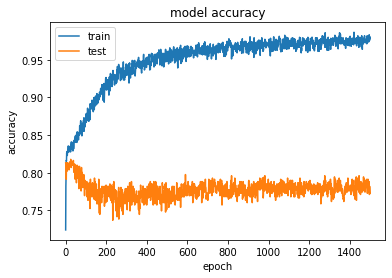

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

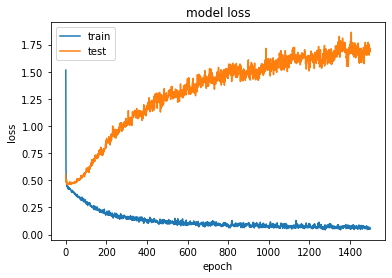

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from pycm import ConfusionMatrix


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.83      0.91      0.87       522
           1       0.31      0.17      0.22       120

    accuracy                           0.77       642
   macro avg       0.57      0.54      0.55       642
weighted avg       0.73      0.77      0.75       642

Predict   0         1         
Actual
0         475       47        

1         99        21        





Overall Statistics : 

95% CI                                                            (0.74016,0.80501)
ACC Macro                                                         0.77259
ARI                                                               0.07048
AUNP                                                              0.54248
AUNU                                                              0.54248
Bangdiwala B                                                      0.73449
Bennett S                                                         0.54517
CBA   

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred_classes))
print("Precision: ", precision_score(y_test_encoded, y_pred_classes, average='weighted'))
print("Recall: ", recall_score(y_test_encoded, y_pred_classes, average='weighted'))
print("F1-score: ", f1_score(y_test_encoded, y_pred_classes, average='weighted'))


# Print classification report
print(classification_report(y_test_encoded, y_pred_classes))

Accuracy:  0.7725856697819314
Precision:  0.7305723748355052
Recall:  0.7725856697819314
F1-score:  0.7465296172709236
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       522
           1       0.31      0.17      0.22       120

    accuracy                           0.77       642
   macro avg       0.57      0.54      0.55       642
weighted avg       0.73      0.77      0.75       642

